In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split

In [4]:
X, y = load_iris(return_X_y=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [6]:
class ADASYN:
    def __init__(self, k_neighbors=3):
        self.k_neighbors = k_neighbors

    def fit_resample(self, X, y):
        class_counts = Counter(y)
        majority_class_count = max(class_counts.values())

        X_resampled = X
        y_resampled = y

        for class_label, count in class_counts.items():
            if count < majority_class_count:
                n_to_generate = majority_class_count - count
                X_class = X[y == class_label]

                nn = NearestNeighbors(n_neighbors=self.k_neighbors).fit(X_class)
                neighbors = nn.kneighbors(X_class, return_distance=False)

                synthetic_samples = np.zeros((n_to_generate, X.shape[1]))

                for i in range(n_to_generate):
                    sample_idx = np.random.randint(0, X_class.shape[0])
                    neighbor_idx = np.random.choice(neighbors[sample_idx][1:])

                    sample = X_class[sample_idx]
                    neighbor = X_class[neighbor_idx]

                    diff = neighbor - sample
                    gap = np.random.rand()
                    synthetic_samples[i] = sample + gap * diff

                X_resampled = np.vstack((X_resampled, synthetic_samples))
                y_resampled = np.hstack((y_resampled, np.full(n_to_generate, class_label)))

        return X_resampled, y_resampled

In [7]:
adasyn = ADASYN(k_neighbors=3)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [8]:
print("y_train:", Counter(y_train))
print("y_train_resampled:", Counter(y_train_resampled))

y_train: Counter({2: 44, 0: 42, 1: 41})
y_train_resampled: Counter({2: 44, 0: 44, 1: 44})


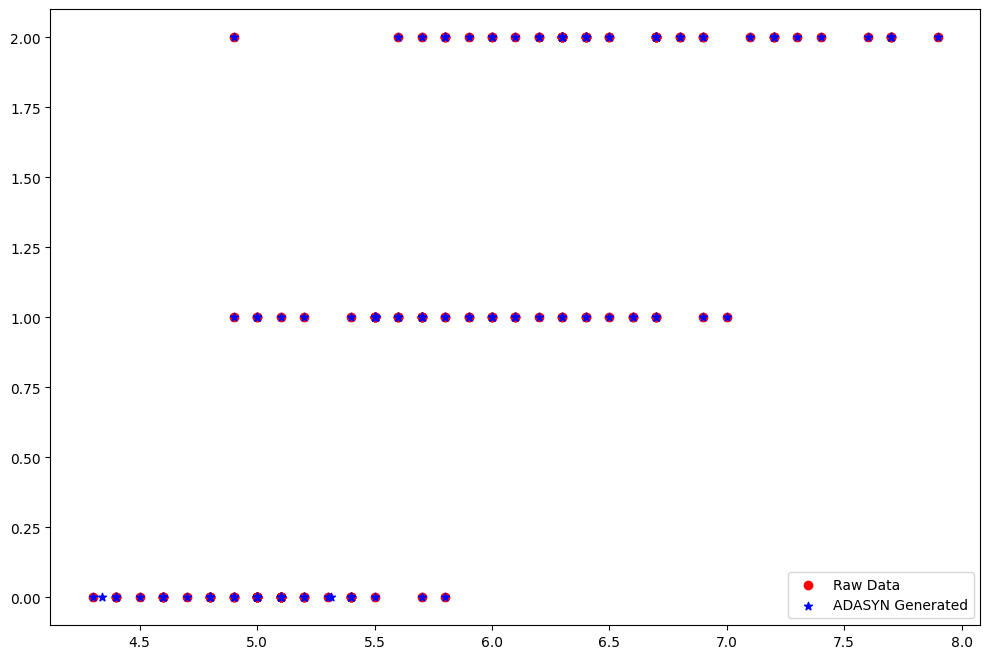

In [9]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 0], y_train, color="r", marker="o")
plt.scatter(X_train_resampled[:, 0], y_train_resampled, color="b", marker="*")
plt.legend(["Raw Data", "ADASYN Generated"])
plt.show()